In [9]:
import sys
sys.path[2]

'/home/gstupp/projects/Wolan/cmoon/CM7_CM1E2d56col_unenr123_rawextract_2017/venv/lib/python3.5'

In [10]:
## generate proteomic dendrograms
# uses data from analysis2016_07_28 and grouped loci filtered and normalized
# yates_normalization and min_quant = 10 in 1 sample, and min_quant = 2 in 2 samples per sample_type

In [17]:
import os
import sys
BASE = "/home/gstupp/projects/Wolan/cmoon/CM7_CM1E2d56col_unenr123_rawextract_2017/"
DATA = os.path.join(BASE, "data")
OUT = os.path.join(BASE, "out")
import pandas as pd
import numpy as np
import shelve
from itertools import chain
from collections import defaultdict, Counter
from metaproteomics import utils
from tqdm import tqdm
from metaproteomics.analysis import taxonomy
from metaproteomics.analysis import DBInfo
from metaproteomics.analysis import build_loci
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [35]:
grouped_loci = utils.load(os.path.join(OUT,"grouped_loci.pkl.gz"))
df = build_loci.to_df(grouped_loci, norm=False)

In [36]:
df.shape

(9, 10467)

/home/gstupp/projects/Wolan/cmoon/CM7_CM1E2d56col_unenr123_rawextract_2017/venv/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


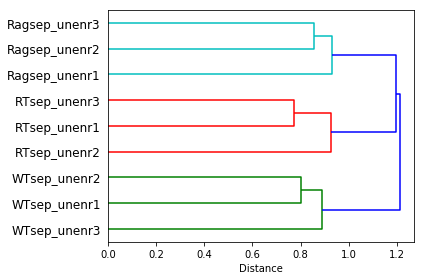

In [40]:
df = build_loci.to_df(grouped_loci, norm=False)

# Log transform
df = np.log(1+df)
# Scale
X = preprocessing.scale(df)

# Unsupervised Hierarchical clustering
import scipy.cluster.hierarchy as hac
z = hac.linkage(X, method = 'average', metric = "correlation")
hac.dendrogram(z,orientation='right', labels = df.index, color_threshold=.95,count_sort=True)
plt.xlabel("Distance")
plt.savefig(os.path.join(OUT, "clustering.pdf"))
plt.show()

In [38]:
#%% Build geneID to GO map
# example: 068724{"tab"}GO:0005488, GO:0003774, GO:0001539, GO:0006935, GO:0009288

annotations = {locus.cluster_id: locus.annotations.get("go",{}) for locus in grouped_loci}
with open(os.path.join(OUT, "geneid2go.map"), 'w') as f:
    for k,v in annotations.items():
        if v:
            print(str(k) + "\t" + ", ".join(v), file=f)